# TP : Fentes d'Young

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## Données LASER & Monte-Carlo

In [2]:
lambda_LASER = 650e-9 # données constructeur JEULIN
u_lambda_LASER = 20e-9/np.sqrt(3) # données constructeur JEULIN

N = 100000 # nb de tirages aléatoires réalisés

## Mesures de $D$ et de la distance totale entre $n$ franges sombres

In [3]:
D = np.array([5.5, 5, 4.5, 4, 3.5, 3])
u_D = np.array([10e-2]*len(D))
L = np.array([4.9e-2, 4.5e-2, 3.45e-2, 3.7e-2, 2.8e-2, 2.4e-2])
u_L = np.array([1e-3]*len(L))
n = np.array([7, 7, 6, 7, 6, 6])

## Calcul de l'interfrange et de son incertitude par méthode MC

In [4]:
inter = []
u_inter = []
for j in range(len(L)):
    inter_store = []
    for i in range(N):
        inter_store.append((L[j]+u_L[j]*np.random.uniform(-1,1))/(n[j]-1))
    inter.append(np.mean(inter_store))
    u_inter.append(np.std(inter_store, ddof=1))

## Tracé de la courbe $i=f(D)$

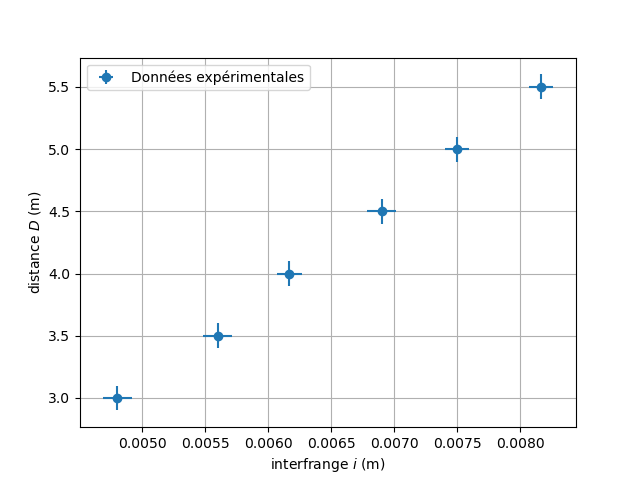

In [5]:
plt.figure()
plt.errorbar(inter,D,xerr=u_inter, yerr=u_D, fmt='o', label='Données expérimentales')
plt.legend()
plt.grid(True)
plt.xlabel(r'interfrange $i$ (m)')
plt.ylabel(r'distance $D$ (m)')
plt.show()

## Interpolation affine pour récupérer la pente par méthode MC et `polyfit`

In [6]:
a_store = []
b_store = []

for i in range(N):
    z=np.polyfit(np.array(inter)+u_inter*np.random.uniform(-1,1,len(inter)), D+np.random.uniform(-1,1,len(D))*u_D, 1)
    a_store.append(z[0])
    b_store.append(z[1])
    
a = np.mean(a_store)
b = np.mean(b_store)
u_a = np.std(a_store, ddof=1)
u_b = np.std(b_store, ddof=1)

## Tracé des mesures expérimentales et de la régression linéaire

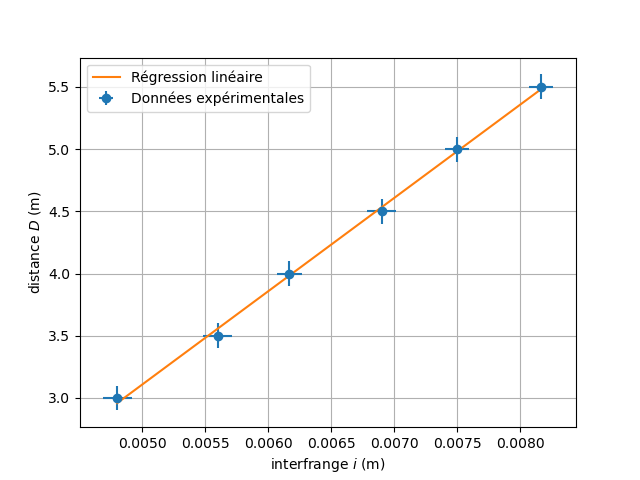

In [7]:
plt.figure()
plt.errorbar(inter,D,xerr=u_inter, yerr=u_D, fmt='o', label='Données expérimentales')
plt.plot(inter,a*np.array(inter)+b,'-', label='Régression linéaire' )
plt.legend()
plt.xlabel(r'interfrange $i$ (m)')
plt.ylabel(r'distance $D$ (m)')
plt.grid(True)
plt.show()

In [8]:
a_Y_store = []
for i in range(N):
    a_Y_store.append((a+np.random.uniform(-1,1)*u_a)*(lambda_LASER+u_lambda_LASER*np.random.uniform(-1,1)))

a_Y = np.mean(a_Y_store)
u_a_Y = np.std(a_Y_store, ddof=1)

In [9]:
print("La distance a qui sépare les fentes est : ", format(a_Y, "#.2e"), "+/-", format(u_a_Y, "#.1e"), "m")

La distance a qui sépare les fentes est :  4.87e-04 +/- 1.1e-05 m


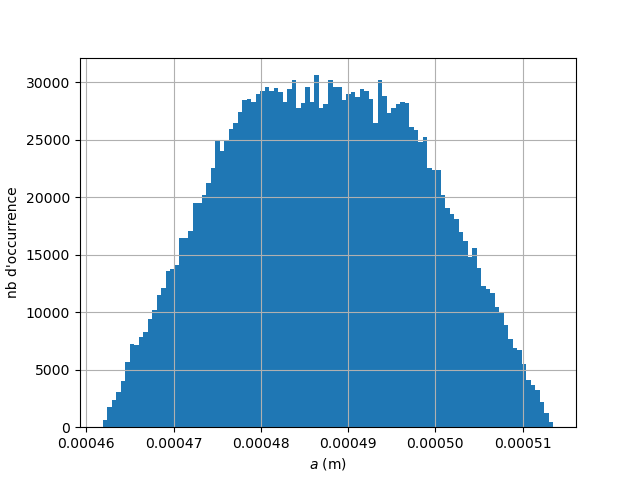

In [10]:
plt.figure()
plt.hist(a_Y_store,bins=100, density=True, stacked=True)
plt.grid(True)
plt.xlabel(r'$a$ (m)')
plt.ylabel('nb d\'occurrence')
plt.show()